In [42]:
import utility
from importlib import reload
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
utility.getmatchingparameterruns({"numberchains":1,"disorder":0})

['compiledRuns/1018',
 'compiledRuns/1015',
 'compiledRuns/1019',
 'compiledRuns/1014',
 'compiledRuns/1016',
 'compiledRuns/1013',
 'compiledRuns/singlepolymer_sheer_0.9',
 'compiledRuns/1010',
 'compiledRuns/1011',
 'compiledRuns/1017',
 'compiledRuns/1',
 'compiledRuns/1012']

## Catalog of runs

200x, 400x: some runs with no disorder
Other runs: Beware! Could have disorder even if "disorder=0", need to fix!!

Some higher V runs

In [ ]:
disorderGraphs(ktruns,0.1)

compiledRuns/4002 0.5 -0.238732414637843 20.0 10.0
compiledRuns/2001 0.4 -0.238732414637843 20.0 10.0
compiledRuns/2002 0.6 -0.238732414637843 20.0 10.0
compiledRuns/2006 1.4 -0.238732414637843 20.0 10.0
compiledRuns/2003 0.8 -0.238732414637843 20.0 10.0
compiledRuns/2005 1.2 -0.238732414637843 20.0 10.0


(array([24.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 20.]),
 array([10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ]),
 <BarContainer object of 10 artists>)

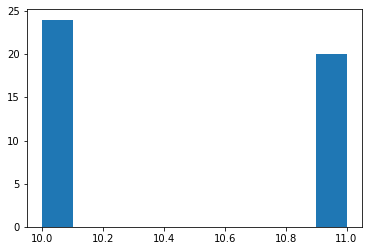

In [249]:


tenchainruns = utility.getmatchingparameterruns({"numberchains":10,"disorder":0})

potential_r = []

ktruns = []

bondlength=0.2

for tcr in tenchainruns:
    runlength = utility.getparameter(tcr,'runlength')
    if runlength == 10000000 and len(tcr)>16 and "Runs/10" not in tcr:
        A,f,kt,boxx = utility.getparameters(tcr,['periodicamplitude','pullforce','kbt','boxdimx'])
        potential_r.append(boxx)
        # if kt != 100 and boxx ==10.:
        if kt != 1. and kt !=100.:# and boxx ==10.:
            print(tcr,kt,v0,f, boxx)
            
            # Alexander's adjustment to V because of HOOMD
            v0 = A * 1/(boxx*2*math.pi)/bondlength
            ktruns.append((-v0,f,kt,boxx/10.,tcr))
        
plt.hist(potential_r)

In [18]:
len(tcr)

16

In [203]:

def getIntersection(thetas,tilt, slope, interp=None):
    lorig = len(thetas)
    if interp is not None:
        thetas2 = np.linspace(np.min(thetas),np.max(thetas),interp)
        tilt = np.interp(thetas2,thetas,tilt)
        thetas = thetas2
    for p in range(round(2.*len(thetas)/lorig),len(thetas)):

        p2 = tilt[p]
        if p2 > slope * thetas[p]:
            return (slope, thetas[p], tilt[p])

    return (slope,0,0)

In [167]:
from ResultsOutputScript import RunDataHandler as rdh


def getThetaTilt(folder):
    testrun = rdh(folder + '/data.txt',quiet=True) 
    thetas = testrun.getForceRange()
    tilt = testrun.getOutput()[0]
    return thetas,tilt

In [34]:
ktruns[10:20]

[(60.0, 'compiledRuns/1009'),
 (60.0, 'compiledRuns/1000'),
 (60.0, 'compiledRuns/4000009'),
 (60.0, 'compiledRuns/3009'),
 (60.0, 'compiledRuns/4000008'),
 (60.0, 'compiledRuns/1006'),
 (60.0, 'compiledRuns/10032'),
 (60.0, 'compiledRuns/10034'),
 (60.0, 'compiledRuns/1001'),
 (60.0, 'compiledRuns/3004')]

## Theory curve from OldCriticalTheta 

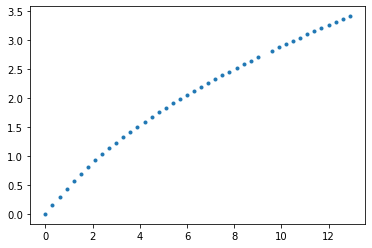

In [251]:
s = "{{0., 0.}, {0.3, 0.149379}, {0.6, 0.295278}, {0.9, 0.435244}, {1.2, 0.568148}, {1.5, 0.693871}, {1.8, 0.812837}, {2.1, 0.925679}, {2.4, 1.03306}, {2.7, 1.13559}, {3., 1.23382}, {3.3, 1.32821}, {3.6, 1.41916}, {3.9, 1.50701}, {4.2, 1.59204}, {4.5, 1.67452}, {4.8, 1.75466}, {5.1, 1.83264}, {5.4, 1.90864}, {5.7, 1.98279}, {6., 2.05523}, {6.3, 2.12607}, {6.6, 2.19541}, {6.9, 2.26335}, {7.2, 2.32996}, {7.5, 2.39533}, {7.8, 2.45952}, {8.1, 2.52259}, {8.4, 2.58461}, {8.7, 2.64562}, {9., 2.70566}, {9.6,2.82306}, {9.9, 2.88049}, {10.2, 2.93711}, {10.5, 2.99297}, {10.8, 3.04809}, {11.1, 3.10251}, {11.4, 3.15624}, {11.7, 3.20932}, {12., 3.26177}, {12.3, 3.31361}, {12.6, 3.36486}, {12.9, 3.41554}}"
s = s.replace("{","")
s = s.replace("}","")
s = s.split(",")
rowx = []
rowy = []
for i in range(0,len(s),2):
    rowx.append(float(s[i]))
    rowy.append(float(s[i+1]))
plt.plot(rowx,rowy,'.')
tcritthx,tcritthy = np.array(rowx)*np.pi**2, np.array(rowy)*np.pi

## Data from no disorder to add to critical curve

In [259]:
tenchainruns = utility.getmatchingparameterruns({"numberchains":10,"disorder":0}) # note this could actually have disorder

potential_r = []

ktruns = []

bondlength=0.2

for tcr in tenchainruns:
    runlength = utility.getparameter(tcr,'runlength')
    if runlength == 10000000 and len(tcr)>16 and "Runs/10" not in tcr:
        A,f,kt,boxx = utility.getparameters(tcr,['periodicamplitude','pullforce','kbt','boxdimx'])
        potential_r.append(boxx)
        # if kt != 100 and boxx ==10.:
        if kt != 1. and kt !=100.:# and boxx ==10.:
            print(tcr,kt,v0,f, boxx)
            
            # Alexander's adjustment to V because of HOOMD
            v0 = A * 1/(boxx*2*math.pi)/bondlength
            ktruns.append((-v0,f,kt,boxx/10.,tcr))

compiledRuns/4002 0.5 0.238732414637843 20.0 10.0
compiledRuns/2001 0.4 -0.238732414637843 20.0 10.0
compiledRuns/2002 0.6 -0.238732414637843 20.0 10.0
compiledRuns/2006 1.4 -0.238732414637843 20.0 10.0
compiledRuns/2003 0.8 -0.238732414637843 20.0 10.0
compiledRuns/2005 1.2 -0.238732414637843 20.0 10.0


0.600270101287071


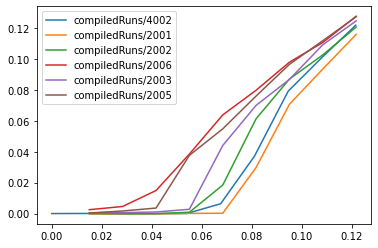

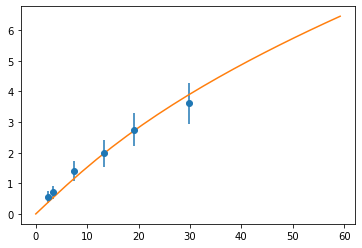

In [275]:
from ResultsOutputScript import RunDataHandler as rdh

v0rs = []
tcrits = []
terrs = []
f = 20. 


import math
def getR(f,a,kbt,theta):
    return math.sqrt(f**2 + (math.tan(theta)*f)**2) * a * theta/kbt
print(getR(20,1,1,0.03))

for v0,f,kt,a,ktrun in ktruns[:]:
    testrun = rdh(ktrun + '/data.txt',quiet=True) 
    thetas = testrun.getForceRange()
    tilt = testrun.getOutput()[0]

    plt.plot(thetas,tilt,label=ktrun)
    _,tcrit,_ = getIntersection(thetas,tilt,.1,100)
    tcrits.append(getR(f,a,kt,tcrit))
    terrs.append(tcrits[-1]/tcrit*(thetas[1]-thetas[0])/1.)
    v0rs.append(v0*f*a**2/kt**2)
    
plt.legend()
    
plt.figure()
plt.errorbar(v0rs,tcrits,yerr=terrs,fmt='o')
plt.plot(tcritthx[:len(tcritthx)//2],tcritthy[:len(tcritthx)//2])

Merge with OldCriticalTheta data

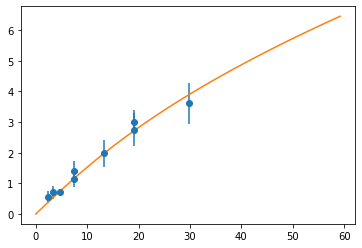

In [279]:
olddata = np.loadtxt('crit_vamp3.npy')

newdata = np.vstack((v0rs,tcrits,terrs)).T

alldata = np.vstack((olddata,newdata))

allv,allt,alle=alldata.T
plt.figure()
plt.errorbar(allv,allt,yerr=alle,fmt='o')
plt.plot(tcritthx[:len(tcritthx)//2],tcritthy[:len(tcritthx)//2])


np.savetxt('crit_vamp3_new.npy',newdata)
np.savetxt('crit_vamp3_all.npy',alldata)

## Disorder runs

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.7,  1. ,  2. , 10. ])

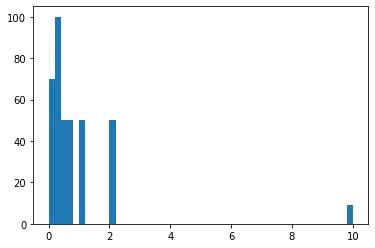

In [231]:
tenchainruns = utility.getmatchingparameterruns({"numberchains":10})

potential_r = []

ktruns = defaultdict(list)

for tcr in tenchainruns:
    runlength,disorderstrength,boxx = utility.getparameters(tcr,['runlength','disorder','boxdimx'])
    if runlength == 10000000 and len(tcr)>19: # and boxx==11: #and disorderstrength != 0. 
        v0,f,kt,boxx = utility.getparameters(tcr,['periodicamplitude','pullforce','kbt','boxdimx'])
        potential_r.append(disorderstrength)
        ktruns[disorderstrength].append((tcr,boxx/10.))
        # print(tcr,boxx)
        
        
plt.hist(potential_r,bins=50)
np.unique(potential_r)

In [216]:
kt

1.0

In [211]:
from ResultsOutputScript import RunDataHandler as rdh
from collections import defaultdict

def disorderGraphs(runs,slope,interp=None,allgraphs=True):
    v0rs = []
    sortedkeys = np.sort([float(x) for x in runs.keys()])
    tcrits = defaultdict(list)
    f = 20. 
    tiltaves = []

    tcritagg = []

    for key in sortedkeys:
        if allgraphs:
            plt.figure(figsize=(4,3))
            plt.title('Disorder = %1.1f' % key)
        tilts = []
        thetas = []
        for ktrun,a in runs[key]:
            testrun = rdh(ktrun + '/data.txt',quiet=True) 
            theta = testrun.getForceRange()
            tilt = testrun.getOutput()[0]
            tilts.append(tilt)
            thetas.append(theta)

            if allgraphs: plt.plot(theta,tilt,'k',alpha=0.05,color='C0')
            _,tcrit,_ = getIntersection(theta,tilt,slope,interp)
            if tcrit > 0.: # eliminate some of the disorder =2 runs which are flat curves
                tcrits[key].append(tcrit*a)

        lengths = [len(tilt) for tilt in tilts]

        if len(np.unique(lengths)) != 1:
            #         minl = np.min(lengths)

            #         tilts = [tilt[:minl] for tilt in tilts]
            #         thetas = thetas[:minl]
            maxl = np.max(lengths)
            tilts = [tilt for tilt in tilts if len(tilt) == maxl]
            thetas = [theta for theta in thetas if len(theta) == maxl]

        tiltave = np.average(tilts,axis=0)
        tiltaves.append((thetas[0],tiltave))
        if allgraphs: plt.plot(thetas[0],tiltave,color='C1',lw = 2)
        _,tcritave,_ = getIntersection(thetas[0],tiltave,slope,interp)
        if allgraphs: plt.plot(thetas[0],np.array(thetas[0])*slope,'k--')
        tcritagg.append(tcritave*a)
        # print(tcritave)

    plt.figure()
    for i,(x,y) in enumerate(tiltaves):
        plt.plot(x,y,label='%1.1f'%sortedkeys[i])
    plt.legend()

    plt.figure()

    tcritgrp = []
    tcritstd = []

    for key in sortedkeys[:-1]:
        plt.hist(tcrits[key],histtype='step',label='%1.1f' % key)
        # print(key,np.average(tcrits[key]),len(tcrits[key]))
        tcritgrp.append(np.average(tcrits[key]))
        tcritstd.append(np.std(tcrits[key]))
    plt.legend()



    plt.figure()
    plt.errorbar(sortedkeys[:-1],tcritgrp,fmt='o',yerr=tcritstd)
    plt.plot(sortedkeys[:-1],tcritagg[:-1],'x')
    plt.xlabel('Disorder strength')
    plt.ylabel('Critical theta')
    plt.title('Slope = %1.2f' % slope)

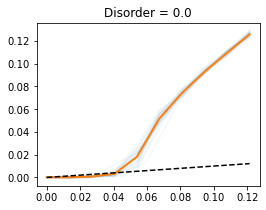

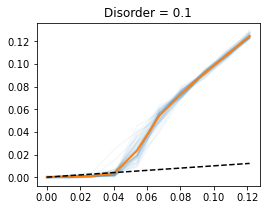

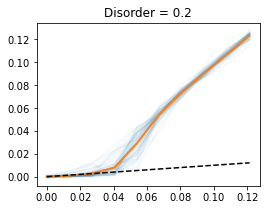

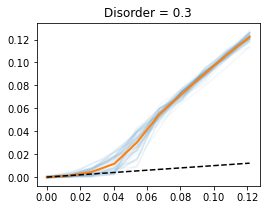

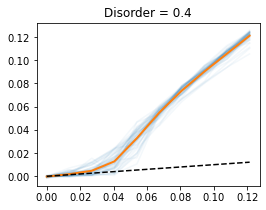

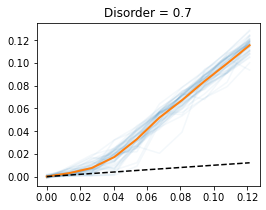

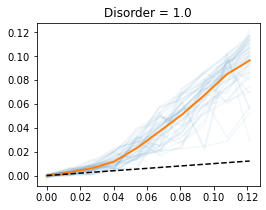

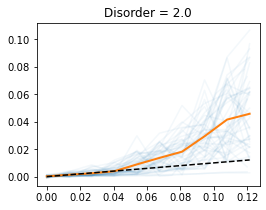

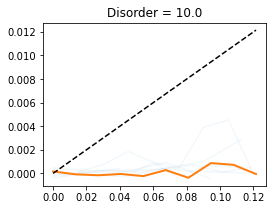

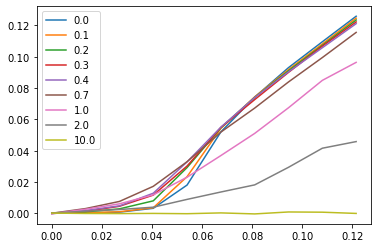

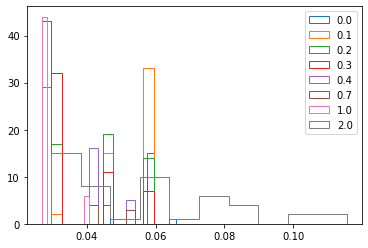

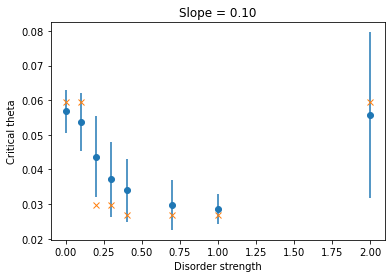

In [212]:
disorderGraphs(ktruns,0.1)

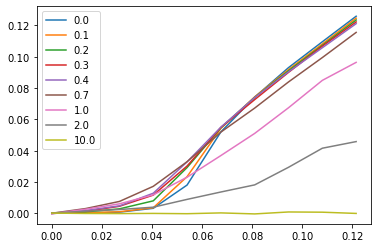

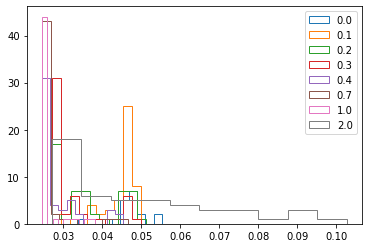

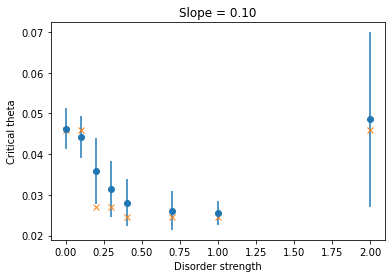

In [238]:
disorderGraphs(ktruns,0.1,100,allgraphs=False)

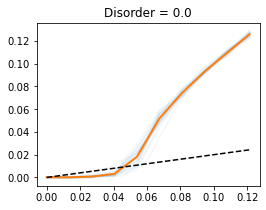

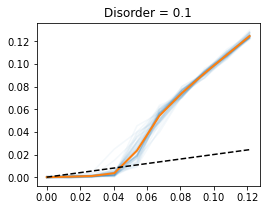

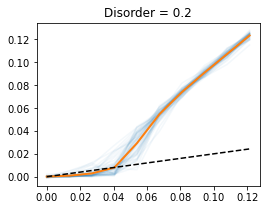

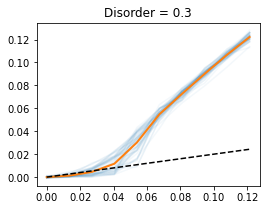

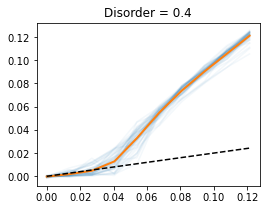

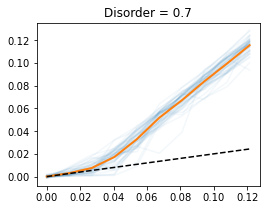

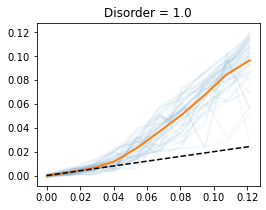

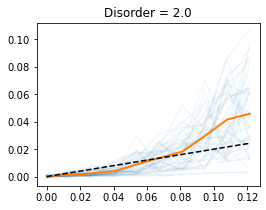

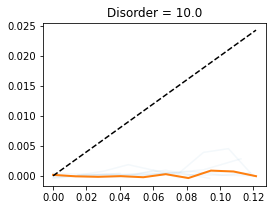

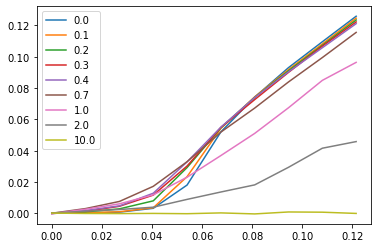

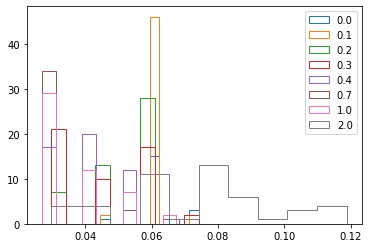

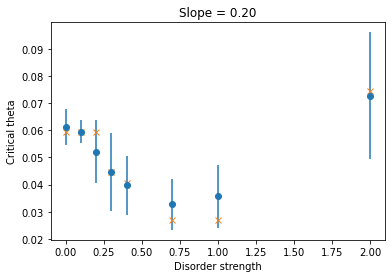

In [213]:
disorderGraphs(ktruns,0.2)

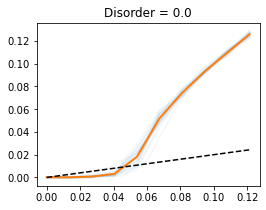

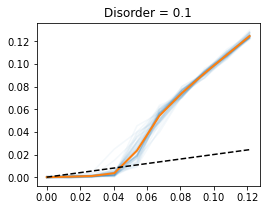

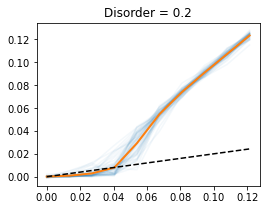

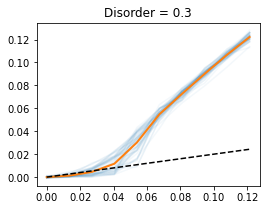

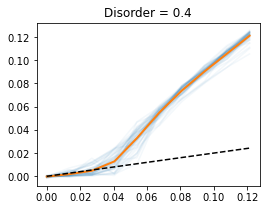

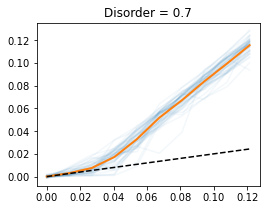

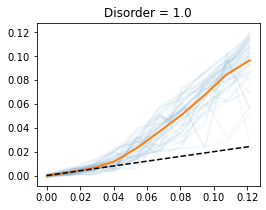

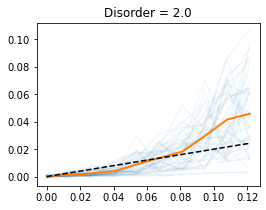

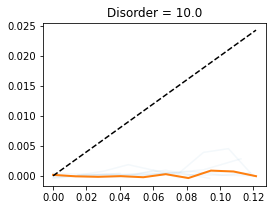

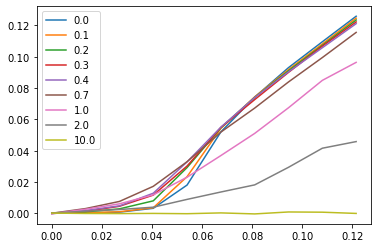

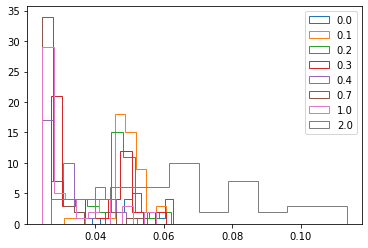

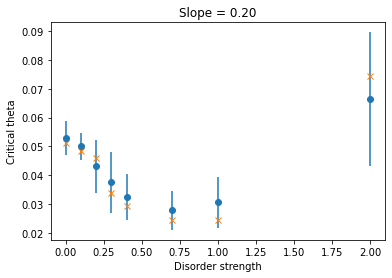

In [214]:
disorderGraphs(ktruns,0.2,100)

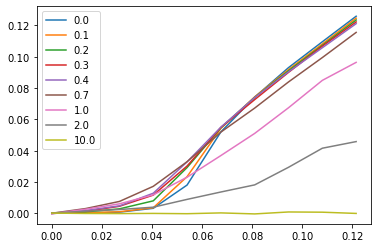

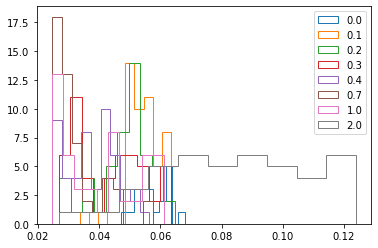

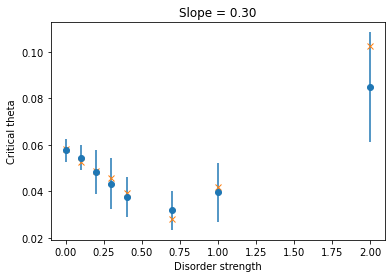

In [232]:
disorderGraphs(ktruns,0.3,100,allgraphs=False)

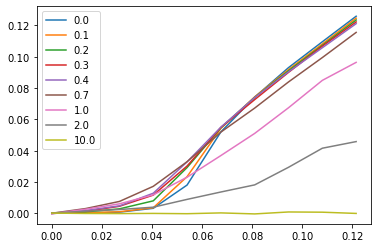

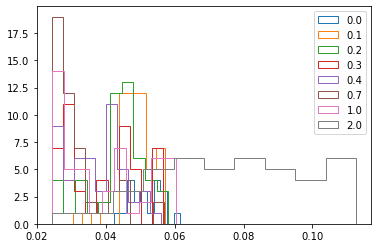

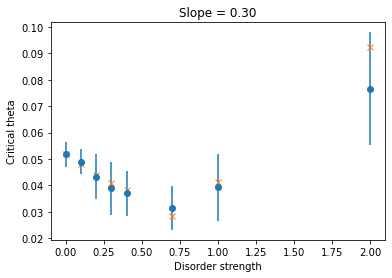

In [209]:
disorderGraphs(ktruns,0.3,1000,allgraphs=False)

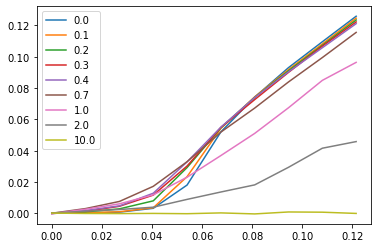

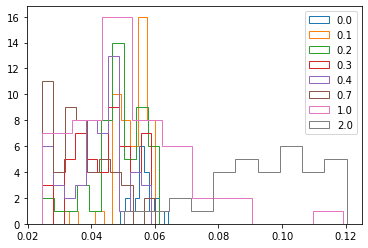

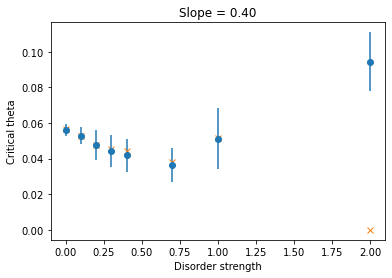

In [210]:
disorderGraphs(ktruns,0.4,100,allgraphs=False)

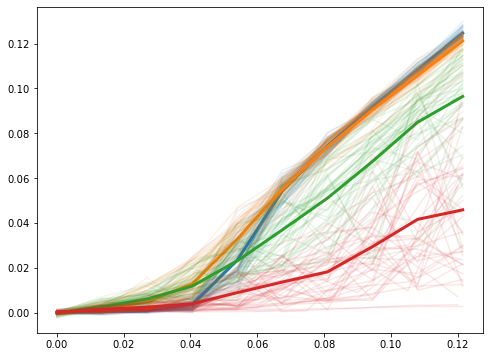

In [173]:
plt.figure(figsize=(8,6))
for i, key in enumerate([0.1,0.4,1,2]):
    tilts = []
    thetas = []
    for ktrun in ktruns[key]:
        testrun = rdh(ktrun + '/data.txt',quiet=True) 
        theta = testrun.getForceRange()
        tilt = testrun.getOutput()[0]
        tilts.append(tilt)
        thetas.append(theta)
        
        plt.plot(theta,tilt,'k',alpha=0.1,color='C%d' %(i))
        _,tcrit,_ = getIntersection(theta,tilt,slope)
        if tcrit > 0.: # eliminate some of the disorder =2 runs which are flat curves
            tcrits[key].append(tcrit)
        
    lengths = [len(tilt) for tilt in tilts]
    
    if len(np.unique(lengths)) != 1:
        #         minl = np.min(lengths)
        
        #         tilts = [tilt[:minl] for tilt in tilts]
        #         thetas = thetas[:minl]
        maxl = np.max(lengths)
        tilts = [tilt for tilt in tilts if len(tilt) == maxl]
        thetas = [theta for theta in thetas if len(theta) == maxl]
        
    tiltave = np.average(tilts,axis=0)
    tiltaves.append((thetas[0],tiltave))
    plt.plot(thetas[0],tiltave,color='C%d' %(i),lw = 3)
    _,tcritave,_ = getIntersection(thetas[0],tiltave,slope)
    #plt.plot(thetas[0],np.array(thetas[0])*slope,'k--')
    tcritagg.append(tcritave)
    # print(tcritave)
    

In [236]:
print(len(tenchainruns))
print([len(ktruns[key]) for key in ktruns])


577
[50, 50, 50, 20, 50, 50, 50, 50, 9]


In [237]:
print(tenchainruns[0])

compiledRuns/219
